In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.11.0'

# Import data

In [3]:
(X_train_all,y_train_all), (X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(X_train_all.shape,y_train_all.shape)

(60000, 28, 28) (60000,)


- 2차원의 28 * 28 크기의 데이터가 60000개 있는 상태로 이해한다. Property는 28 * 28 의 형식이라고 생각하면 될 듯.

In [8]:
X_train_all[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

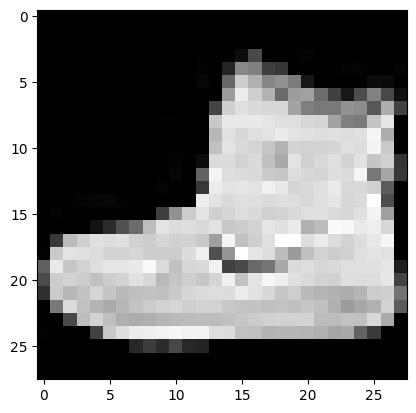

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train_all[0],cmap='gray')
plt.show()

# EDA

In [12]:
import numpy as np
import pandas as pd

In [6]:
print(y_train_all[:10])

[9 0 0 3 0 2 7 2 5 5]


In [9]:
class_names = ['티셔츠/윗도리','바지','스웨터','드레스','코트','샌들','셔츠','스니커즈','가방','앵클부츠']

In [10]:
print(class_names[y_train_all[0]])

앵클부츠


In [13]:
np.bincount(y_train_all)

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64)

- 10개의 Class가 골고루 분포해있음을 확인할 수 있다.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all,stratify=y_train_all, test_size=0.2, random_state=42)

In [17]:
print(np.bincount(y_train),np.bincount(y_val))

[4800 4800 4800 4800 4800 4800 4800 4800 4800 4800] [1200 1200 1200 1200 1200 1200 1200 1200 1200 1200]


In [18]:
X_train = X_train/255
X_val = X_val/255

#이미지일 경우 pixel의 최대값인 255로 나눠주기도 한다.
#Normalization 과정임.

In [19]:
print(X_train.shape,X_val.shape)

(48000, 28, 28) (12000, 28, 28)


In [20]:
X_train = X_train.reshape(-1,784)
X_val = X_val.reshape(-1,784)

- 784 = 28 * 28 이다. 1차원배열로 모델에 넣어야하기 때문임.

# Target 조정
- 타깃을 One-Hot 인코딩으로 변경해줘야한다.

In [21]:
tf.keras.utils.to_categorical([0,1,3])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [22]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [24]:
print(y_train_encoded.shape,y_val_encoded.shape)

(48000, 10) (12000, 10)


In [26]:
print([y_train[0]],[y_train_encoded[0]])

[6] [array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)]


# Model

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100,activation='sigmoid',input_shape=(784,)))
# 은닉층의 유닛(뉴런) 개수 100개.
# Property가 784개 이기 때문,

model.add(Dense(10, activation='softmax'))
# 출력이 10개 항목이기 때문.

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
# metrics : History에서 기록 후 참고하기 위함.
# loss : categorical_crossentropy, mse 등등을 넣을 수 있음
history = model.fit(X_train,y_train_encoded, epochs=40, validation_data=(X_val,y_val_encoded))

Epoch 1/40
1500/1500 [==============================] - 10s 6ms/step - loss: 1.3913 - accuracy: 0.6458 - val_loss: 0.9668 - val_accuracy: 0.7327
Epoch 2/40
1500/1500 [==============================] - 11s 7ms/step - loss: 0.8418 - accuracy: 0.7454 - val_loss: 0.7482 - val_accuracy: 0.7640
Epoch 3/40
1500/1500 [==============================] - 10s 7ms/step - loss: 0.7077 - accuracy: 0.7656 - val_loss: 0.6614 - val_accuracy: 0.7824
Epoch 4/40
1500/1500 [==============================] - 10s 7ms/step - loss: 0.6426 - accuracy: 0.7820 - val_loss: 0.6091 - val_accuracy: 0.7936
Epoch 5/40
1500/1500 [==============================] - 10s 7ms/step - loss: 0.6012 - accuracy: 0.7953 - val_loss: 0.5741 - val_accuracy: 0.8042
Epoch 6/40
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5714 - accuracy: 0.8042 - val_loss: 0.5493 - val_accuracy: 0.8112
Epoch 7/40
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5488 - accuracy: 0.8123 - val_loss: 0.5295 - val_ac

In [30]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


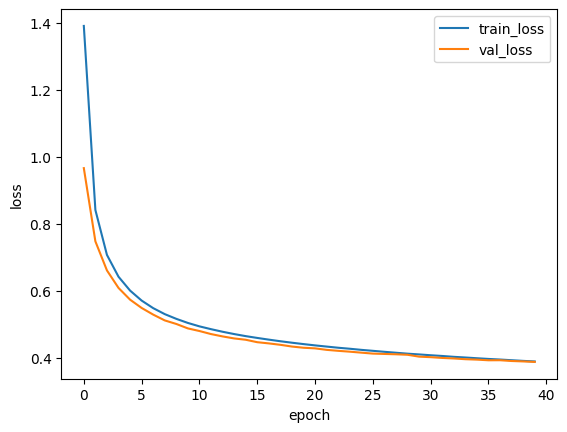

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

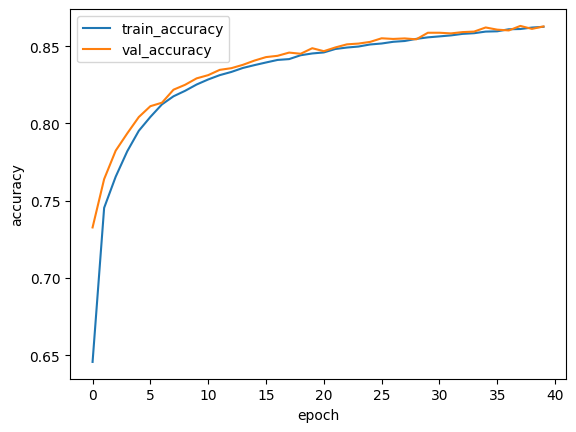

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

In [33]:
loss, accuracy = model.evaluate(X_val,y_val_encoded,verbose=0)
print(accuracy)

0.8627499938011169
